<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/machine_learning/ensemble_learning/iris_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Las losowy - Iris dataset

In [0]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [0]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
all_data = np.c_[data, targets]
df = pd.DataFrame(all_data, columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
data = data[:, [2, 3]]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 2)
X_test shape: (38, 2)
y_train shape: (112,)
y_test shape: (38,)


In [6]:
from sklearn.ensemble import RandomForestClassifier

# uczenie zespołowe dla 10 drzew decyzyjnych (n_estimators=10)
# predykcje są tworzone na podstawie losowania wśród tych modeli
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
clf.score(X_test, y_test)

1.0

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

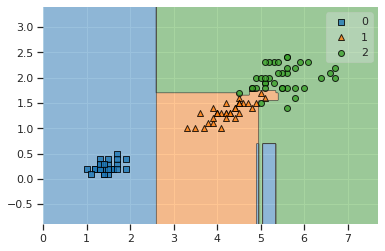

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf)

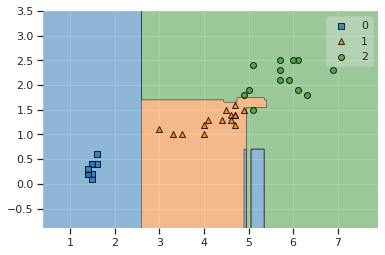

In [10]:
plot_decision_regions(X_test, y_test, clf)

### Grid Search
Służy do sprawdzenia jaka liczba estymatorów jest najlepsza.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': np.arange(1, 100)}]

gs = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy')
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=F...
             param_grid=[{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26

In [14]:
# model zachowuje się najlepiej już przy czterech estymatorach
gs.best_params_

{'n_estimators': 4}

In [0]:
model = gs.best_estimator_

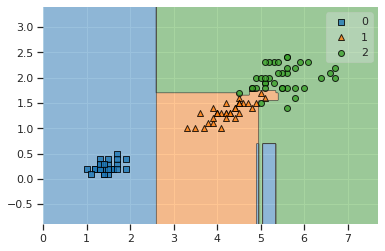

In [16]:
plot_decision_regions(X_train, y_train, clf)

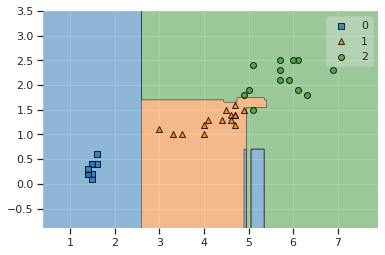

In [17]:
plot_decision_regions(X_test, y_test, clf)

In [18]:
model.score(X_test, y_test)

0.9736842105263158